In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from math import log10, floor
import matplotlib
import os


In [ ]:
all_cell_data = pd.read_pickle("all_cell_data")
all_cell_data = all_cell_data.sort_values(['date', 'cell']).reset_index(drop=True)

### add cell ID to dataframe 
all_cell_data['ID'] = np.zeros(len(all_cell_data))
ID = pd.read_csv('cell_ID.csv').dropna()
cell_ID = [0]*len(all_cell_data)
for i, row in all_cell_data.iterrows(): 
    date = row.date
    cell = row.cell
    row_id = ID[(ID.Date==int(row.date)) & (ID.Cell == row.cell)].ID.values
    all_cell_data.at[all_cell_data[(all_cell_data.date==date) 
    & (all_cell_data.cell == cell)].index, 'ID'] = row_id[0]

all_cell_data

,date,cell,RMP,rheobase,threshold,height,width,spikes,spikes_hold,spike_n,spike_n_hold,spike_r,spike_r_hold,spike_adapt,spike_adapt_hold,Rm,tau,ID
0,20220707,1,-74.630157,"[149.03221316976908, 159.27827240633783, 159.2...","[-38.891920872538336, -40.83383531376182, -40....","[105.160805, 110.26995, 111.47681]","[2.1, 1.9, 1.9]","[[-98.77690813100523, -47.85448945898237, 1.52...","[[-98.77690813100523, -47.85448945898237, 1.52...","[[-98.77690813100523, -47.85448945898237, 1.52...","[[-98.77690813100523, -47.85448945898237, 1.52...","[[-98.77690813100523, -47.85448945898237, 1.52...","[[-98.77690813100523, -47.85448945898237, 1.52...","[201.76526629586633, 2.388003748828491]","[201.76526629586633, 2.388003748828491]","[[[113.47644167789252, 93.458936900611, 73.816...",NaN,Saline
1,20220708,1,-75.099129,"[70.28636567909794, 70.2855784819564, 75.13400...","[-22.939060593249597, -27.233256168712735, -25...","[54.862885, 50.08493, 50.902252]","[4.75, 5.95, 5.45]","[[-98.76244724129806, -47.831514523020836, 1.4...","[[-49.60929992569704, 1.5185198505064996, 50.9...","[[-98.76244724129806, -47.831514523020836, 1.4...","[[-49.60929992569704, 1.5185198505064996, 50.9...","[[-98.76244724129806, -47.831514523020836, 1.4...","[[-49.60929992569704, 1.5185198505064996, 50.9...","[201.59789914744158, nan]","[201.4675185444051, nan]","[[[69.86973688712075, 50.44179420416068, 30.22...","[[-73.92702358215125, 0.1055431040559855, -0.1...",Saline
2,20220708,2,-75.868767,"[45.482347916950836, 45.48803124897407, 40.606...","[-35.29294542483808, -37.04935203235441, -36.8...","[103.50076, 105.38171, 105.334274]","[2.85, 2.8, 2.65]","[[-98.80212479771382, -47.873752477278465, 1.4...","[[-84.21371875714632, -33.299918161812876, 16....","[[-98.80212479771382, -47.873752477278465, 1.4...","[[-84.21371875714632, -33.299918161812876, 16....","[[-98.80212479771382, -47.873752477278465, 1.4...","[[-84.21371875714632, -33.299918161812876, 16....","[201.60021125671835, nan]","[216.39360067231343, nan]","[[[35.35746617938748, 15.869383278918212, -4.7...","[[-70.32408706650678, 4.17684068547434, 0.0979...",Saline
3,20220708,3,-78.746696,"[80.90743521328231, 80.94875735412268, 80.9289...","[-42.795710893392595, -43.19012117735315, -43....","[94.31119, 94.392395, 93.392136]","[1.1, 1.1, 1.1]","[[-98.73382477569116, -47.85225509671356, 1.46...","[[-84.24877167534105, -33.29138453217056, 16.2...","[[-98.73382477569116, -47.85225509671356, 1.46...","[[-84.24877167534105, -33.29138453217056, 16.2...","[[-98.73382477569116, -47.85225509671356, 1.46...","[[-84.24877167534105, -33.29138453217056, 16.2...","[201.6165393808981, 1.1637931034482758]","[216.2805609272367, 1.3202614379084967]","[[[55.50750493633257, 35.36701547294723, 15.89...","[[-73.70794840868395, 2.6482638572089083, 0.02...",Saline
4,20220708,4,-44.593876,NaN,NaN,NaN,NaN,"[[-98.6884068810692, -47.79602440063993, 1.514...","[[-308.28769939162146, -257.4089021444428, -20...","[[-98.6884068810692, -47.79602440063993, 1.514...","[[-308.28769939162146, -257.4089021444428, -20...","[[-98.6884068810692, -47.79602440063993, 1.514...","[[-308.28769939162146, -257.4089021444428, -20...","[201.66927816396654, nan]","[142.73865261623266, 1.5375722543352601]","[[[-68.68997889679588, -88.87631805268633, -10...","[[-79.20917690758463, 1.7197981226308044e-12, ...",Saline
5,20220708,5,-57.022362,"[76.5580945475354, 76.58241564914373, 76.64843...","[-38.46688668893874, -36.83360933257684, -38.2...","[113.65712, 113.034096, 112.347115]","[2.15, 2.2, 2.15]","[[-98.69765594787557, -47.791823425644246, 1.5...","[[-73.4159169918239, -22.783139526927783, 27.0...","[[-98.69765594787557, -47.791823425644246, 1.5...","[[-73.4159169918239, -22.783139526927783, 27.0...","[[-98.69765594787557, -47.791823425644246, 1.5...","[[-73.4159169918239, -22.783139526927783, 27.0...","[201.73329983400862, 2.4120521172638436]","[177.66474429176355, 2.0686274509803924]","[[[66.07361604625486, 45.95318325302296, 26.62...","[[-74.31177144932467, 2.64

In [ ]:
### define cell type based on spike rate
cell_type = []
for spike_data in all_cell_data.spike_n_hold.values:
    if type(spike_data) == float:
        cell_type.append('NA')
    elif np.max(spike_data[1]) < 40:
        cell_type.append('pyrad')
    else:
        cell_type.append('inter')
all_cell_data['cell_type'] = cell_type
pyrad_data = all_cell_data[all_cell_data.cell_type == 'pyrad']

In [ ]:
### define conditions and the colors to be used for each condition 
conds = ['Saline', 'DOI', 'Saline_48h', 'DOI_48h']
colors = {'Saline': 'grey',
          'DOI': 'deeppink',
          'Saline_48h': 'k',
          'DOI_48h': 'mediumblue'}

In [ ]:
### statistics 
def round_sig(x, sig=2):
    """
    round value to 2 significant figures
    """
    if np.isnan(x):
        return 1
    return round(x, sig-int(floor(log10(abs(x))))-1)
    
def unpaired_ttest(data, actual = True):
    """
    perform unpaired t test
    actual: bool return the p value rounded to 2 sf
    else returns the p as *
    """
    t, p = stats.ttest_ind(*data)
    if actual:
        return round_sig(p, 2)

    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "ns"

In [ ]:
### functions for plotting the data

def plot_stats(plt, data, x_N):
    """
    add annotations for statistics 
    """
    plt.xticks(np.arange(len(conds)), labels=x_N)
    max_all = np.nanmax(np.concatenate(data))
    min_all = np.nanmin(np.concatenate(data))

    combs = [(0, 1), (1, 3), (2, 3)]
    pos = [0, 1, 0]

    for a, (i, j) in zip(pos,combs): 
        plt.plot([i, j], [max_all + (0.06+ a*0.07)*(max_all-min_all)]*2, 'k-', lw = 2)
        plt.text(i + (j-i)/2, max_all + (0.065 + a*0.07)*(max_all-min_all), unpaired_ttest((data[i], data[j])), ha = 'center')
    plt.ylim(min_all - 0.15*(max_all-min_all), max_all + 0.3*(max_all-min_all))

def plot_dots(data_set, value, average = False, conds = conds):
    """
    Make and save plots of data 
    data_set: DataFrame containing the data to be plotted
    value: str of measurement to make plot for 
    average: bool take average over repeated measurements
    conds: list of conditions to plot
    """
    ylabels = {'RMP': 'RMP (mV)',
             'rheobase': 'Rheobase (pA)',
             'threshold': 'Threshold (mV)',
             'height': 'Height (mV)',
             'width': 'Width (mV)', 
             'spike_adapt_hold': 'Adaptation Ratio',
             'Rm': 'Rm (M$\Omega$)',
             'tau': 'Tau (s$^{-1}$)'
             }

    plt.figure(figsize = (10, 10))
    
    # plot font size 
    font = {'family' : 'sans-serif',
        'size'   : 26}

    matplotlib.rc('font', **font)
    
    plt.ylabel(ylabels[value])
    data = []
    x_N = []
    for i, cond in enumerate(conds):
        data_cond = data_set[data_set.ID == cond][value].dropna().values
        
        # take average of trials 
        if average:
            data_cond = [np.nanmean(trials) for trials in data_cond]
        
        # special cases
        if value == 'spike_adapt_hold':
            data_cond = np.array([adapt[1] for adapt in data_cond])
            data_cond = data_cond[np.array([i for i, x in enumerate(data_cond) if not np.isnan(x)])] # drop nan values
        if value == 'Rm':
            data_cond = [r[1][0]*1000 for r in data_cond]
        if value == 'tau':
            data_cond = np.array([t[0][2] for t in data_cond])
            data_cond = data_cond[np.where(data_cond > 0)[0]]
        
        data.append(data_cond)
        plt.plot(np.ones(len(data_cond))*i, data_cond, 'o', color = colors[cond], alpha = 0.5, ms = 15)
        plt.plot(np.array([-0.2, 0.2])+i, [np.nanmean(data_cond)]*2, color = colors[cond])
        
        x_N.append(cond + ' \nN = {}'.format(len(data_cond)))
    
    # add t test stats
    plot_stats(plt, data, x_N)

    # save 
    if not os.path.exists('plots'):
        os.makedirs('plots')
    plt.savefig('plots/{}.pdf'.format(value))

def plot_dot_line(data_set, value, conds, lims = (-50, 250), outlier = 25, stats = True):
    plt.figure(figsize=(10,10))
    # plot font size 
    font = {'family' : 'sans-serif',
        'size'   : 26}

    labels = {'spike_n_hold':['current (pA)', 'spike count'],
              'spike_r_hold':['spike number', 'rate [Hz]']
              }
    
    plt.xlabel(labels[value][0])
    plt.ylabel(labels[value][1])

    data = {}
    for cond in conds:
        id_data = data_set[data_set.ID == cond][value].dropna()
        n_data = {}
        for I, N in id_data:
            I_step = round(np.mean(np.diff(I))) # current step between sweeps 
            if I_step == 0:
                continue
            I = np.array([I_step * round(i/I_step) for i in I]) # round values to make averaging across sweeps cleaner 
            
            if value == 'spike_r' or value == 'spike_r_hold':
                # values at 200 pA
                idx_200 = np.where(I == 200)[0]
                if len(idx_200) == 0:
                    continue
                N = N[idx_200[0]]
                if len(N) == 0:
                    continue 
                I = np.arange(len(N))
        
            
            if np.max(N) > outlier:
                continue
            
            
            plt.plot(I, N, 'o-', color = colors[cond], ms = 10, alpha = 0.2)
            
            # assign count to current value
            for i, n in zip(I, N):
                if i not in n_data.keys():
                    n_data[i] = []
                n_data[i].append(n)

        for i in sorted(n_data):
            if i not in data:
                data[i] = []
            data[i].append(n_data[i])

        # take average of count
        N_ave = []
        N_sem = []
        I_val = []
        for i in sorted(n_data):
            if lims[0] <= i <= lims[1]:
                I_val.append(i)
                N_ave.append(np.mean(n_data[i]))
                N_sem.append(np.std(n_data[i])/np.sqrt(len(n_data[i])))
        N_ave = np.array(N_ave)
        N_sem = np.array(N_sem)
        
        rng = lims[1] - lims[0]
        plt.xlim(lims[0] - 0.1 * rng , lims[1] + 0.1*rng)
        plt.plot(I_val, N_ave, 'o-', color = colors[cond], ms = 15, label = cond)
        plt.fill_between(I_val, N_ave - N_sem, N_ave + N_sem, color = colors[cond], alpha = 0.5)
    
    if stats:
        for i in data:
            if i < lims[0] or i > lims[1] or len(data[i]) != 2:
                continue
            sig = unpaired_ttest(data[i])
            if sig < 0.1:
                plt.text(i, np.max([np.mean(n) for n in data[i]]) + 3, sig, ha = 'center', fontsize = 15)
    plt.legend()
    
    # save 
    if not os.path.exists('plots'):
        os.makedirs('plots')
    plt.savefig('plots/{}.pdf'.format(value))


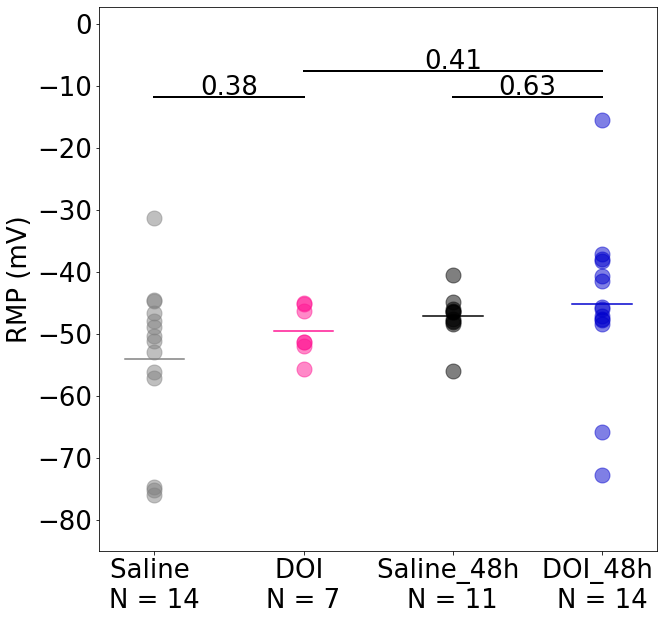

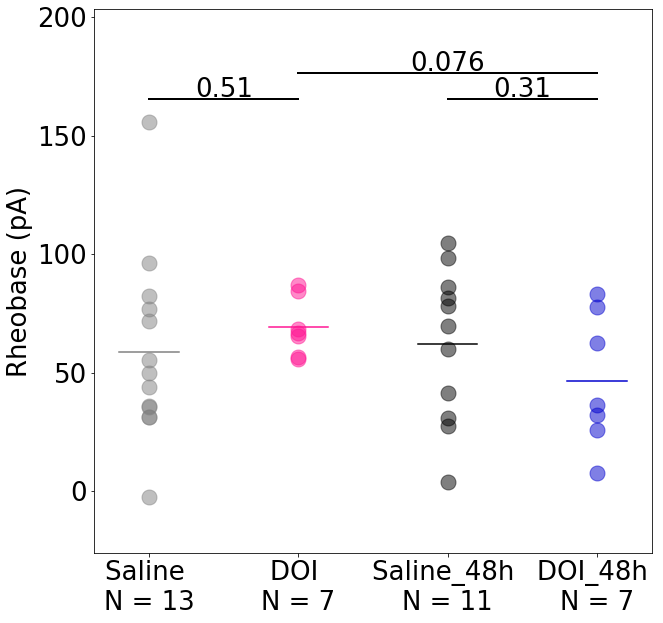

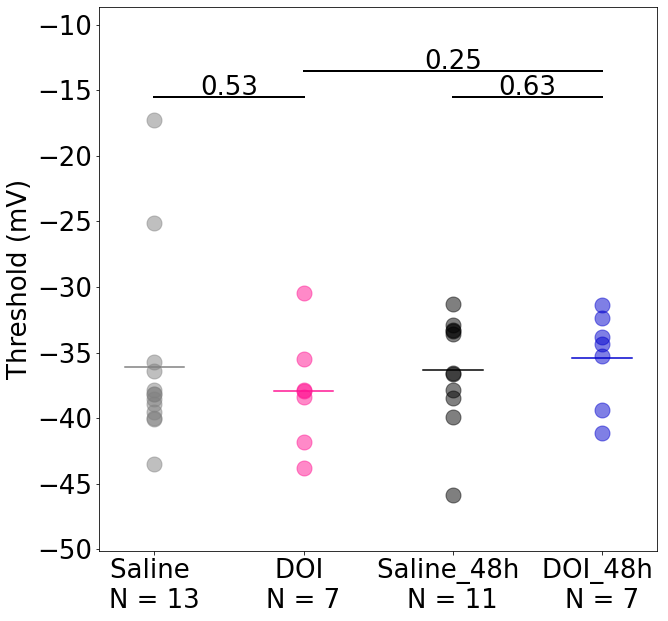

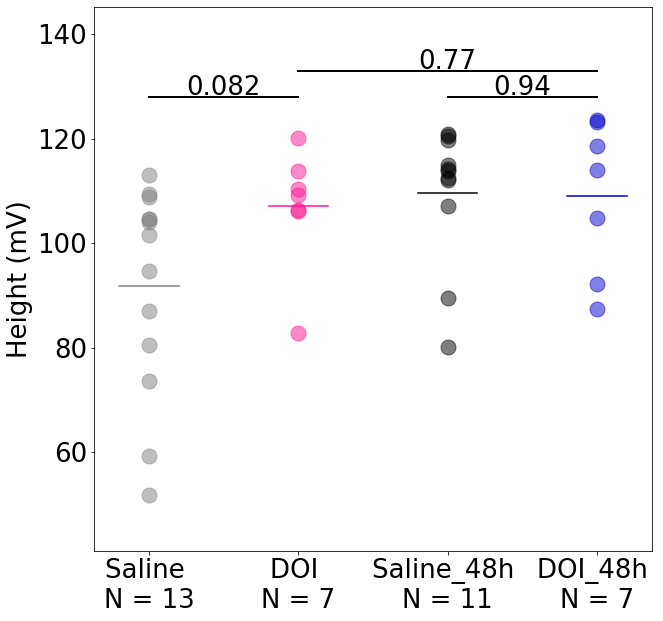

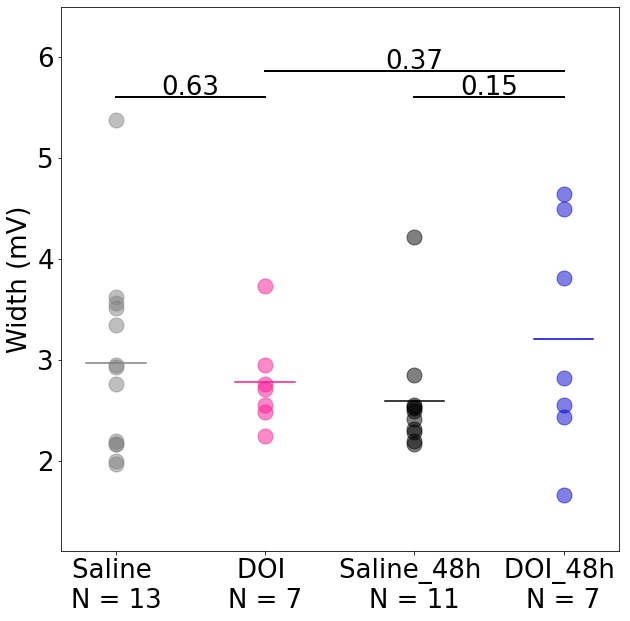

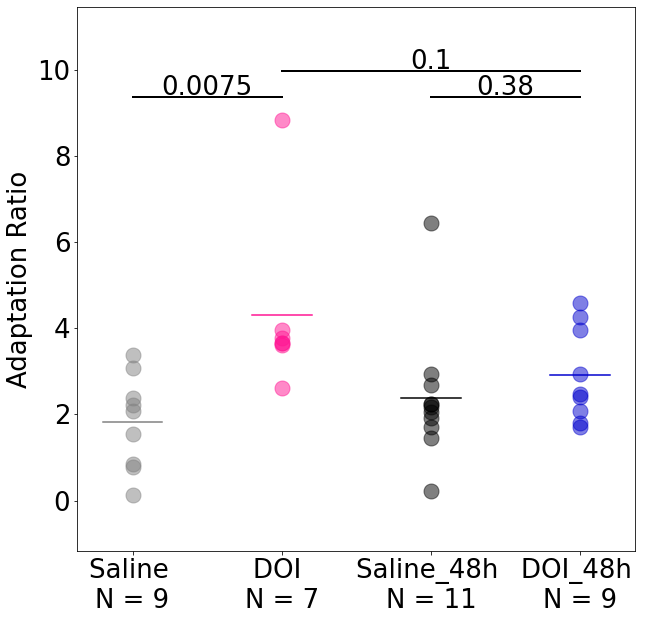

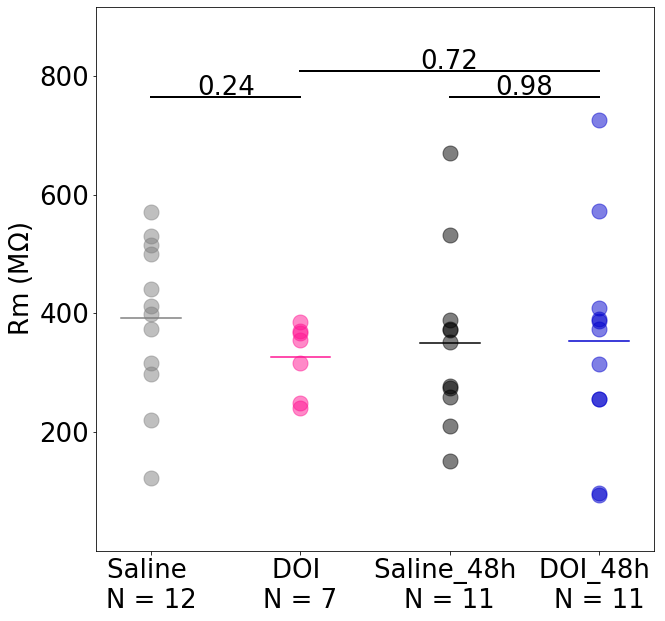

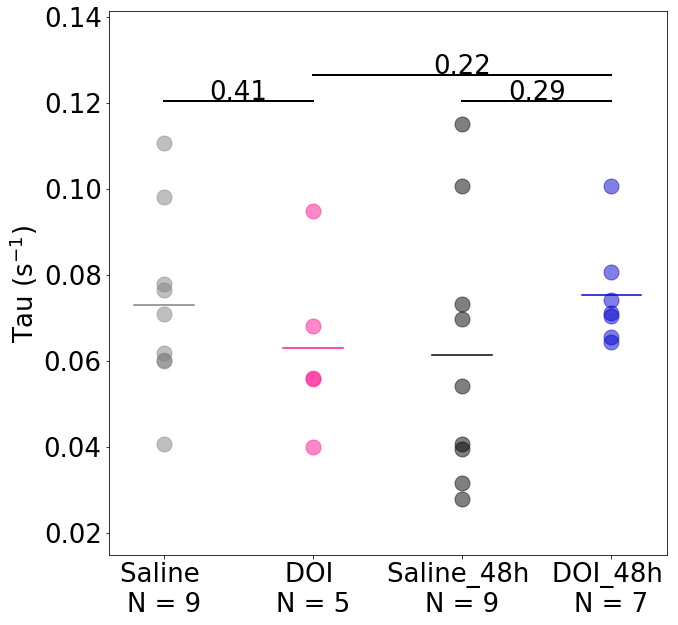

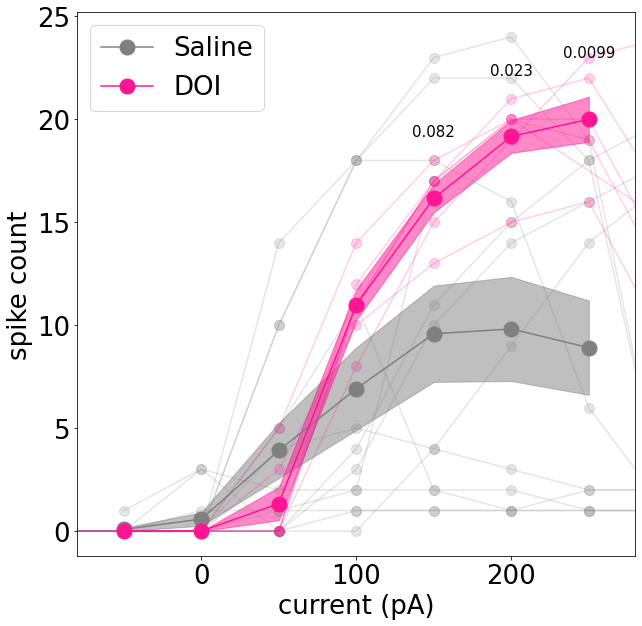

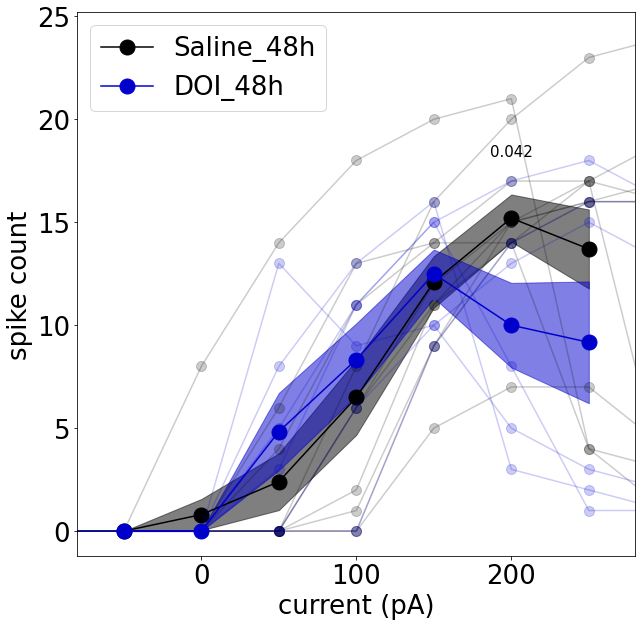

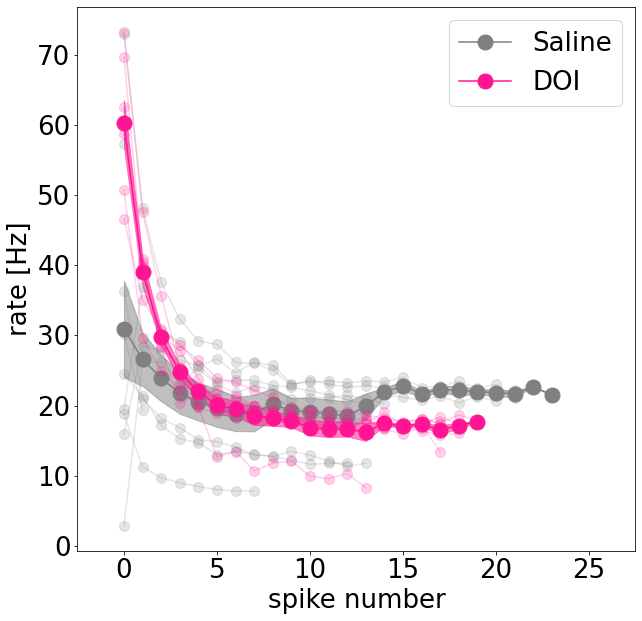

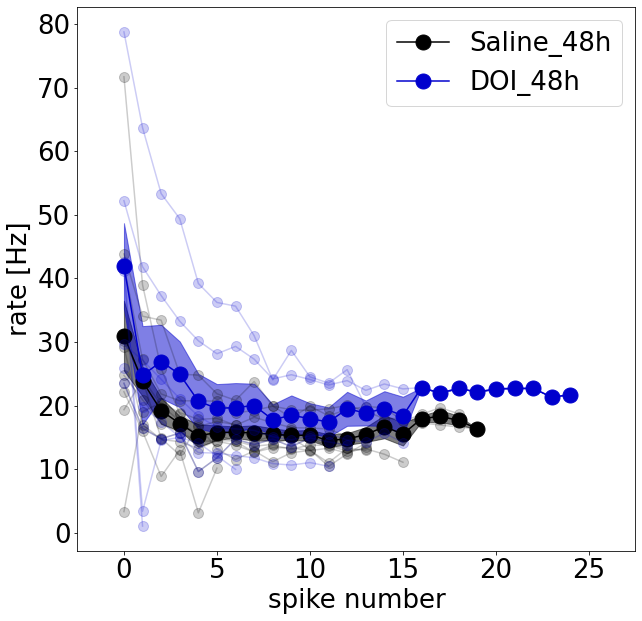

In [ ]:
### plots are saved in "plots" folder
plot_dots(pyrad_data, 'RMP')
plot_dots(pyrad_data, 'rheobase', average = True)
plot_dots(pyrad_data, 'threshold', average = True)
plot_dots(pyrad_data, 'height', average = True)
plot_dots(pyrad_data, 'width', average = True)
plot_dots(pyrad_data, 'spike_adapt_hold')
plot_dots(pyrad_data, 'Rm')
plot_dots(pyrad_data, 'tau')

plot_dot_line(pyrad_data, 'spike_n_hold', conds = ['Saline', 'DOI'], outlier = 25)
plot_dot_line(pyrad_data, 'spike_n_hold', conds = ['Saline_48h', 'DOI_48h'], outlier = 25)

plot_dot_line(pyrad_data, 'spike_r_hold', conds = ['Saline', 'DOI'], lims = (0, 25), outlier = 80, stats = False)
plot_dot_line(pyrad_data, 'spike_r_hold', conds = ['Saline_48h', 'DOI_48h'], lims = (0, 25), outlier = 80, stats = False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=99013d08-680f-4983-9780-1a2087bba930' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>